# LSTM Forecasting

In [1]:
# --- Repo path bootstrap so imports like `from price_forecast...` work ---
import os, sys
REPO_ROOT = os.path.abspath(os.path.join(os.path.dirname("__file__"), ".."))
SRC_ROOT = os.path.join(REPO_ROOT, "src")
if SRC_ROOT not in sys.path:
    sys.path.insert(0, SRC_ROOT)

# Optional, for iterative dev:

data_dir = os.path.join(REPO_ROOT, "data")  # where data is stored

In [2]:
SRC_ROOT

'c:\\Users\\HarrisDeralas\\Downloads\\panagiotis_files\\price_forecast\\src'

In [3]:
data_dir

'c:\\Users\\HarrisDeralas\\Downloads\\panagiotis_files\\price_forecast\\data'

## Build the dataset

In [4]:
import pandas as pd
import numpy as np

from price_forecast.config import (
    TimezoneConfig, Naming, DAMConfig, WeatherConfig, WeatherSite
)
from price_forecast.pipeline.dataset_builder import DatasetBuilder
from price_forecast.utils.merge import TimeSeriesMerger


In [5]:
from entsoe import EntsoePandasClient
client = EntsoePandasClient(api_key="7260b39e-b41a-4905-a402-4a65bd531f3f")

In [6]:
tz_cfg = TimezoneConfig()
naming = Naming(dt_local="datetime_local", dam_price="dam_price_eur_mwh")
dam_cfg = DAMConfig(base_dir="../data")
sites = [
    WeatherSite("athens", 37.98, 23.72),
    WeatherSite("thessaloniki", 40.64, 22.94),
    WeatherSite("heraklion", 35.34, 25.13),
]
wx_cfg = WeatherConfig()

In [9]:
builder = DatasetBuilder(
    tz_cfg=tz_cfg,
    naming=naming,
    dam_cfg=dam_cfg,
    weather_sites=sites,
    weather_cfg=wx_cfg,
    entsoe_client=client,
    entsoe_prefix="entsoe_",
)

In [33]:
df  = builder.create_dataset(start_date="2019-01-01", end_date="2025-09-30", add_prev_day=True,as_relative=False)

Finished building DAM data.
Finished building ENTSO-E data.
Finished building Weather data.
Finished merging all data on UTC axis.
Converted merged data back to local timezone.
Added previous-day DAM price feature.
Added difference features for DAM price and previous-day DAM price.


In [34]:
df['month'] = df['datetime_local'].dt.month
df['year'] = df['datetime_local'].dt.year
df['day_of_week'] = df['datetime_local'].dt.dayofweek

In [35]:
df2 = df.copy()

In [46]:
df_new = df.copy().resample('M', on='datetime_local').agg(['min','max','mean','std'])
df_final = df_new['dam_price_eur_mwh']
df_final = df_final.reset_index()

C:\Users\HarrisDeralas\AppData\Local\Temp\ipykernel_20964\1672269998.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_new = df.copy().resample('M', on='datetime_local').agg(['min','max','mean','std'])


In [ ]:
df_final['ratio'] = (df_final['max'] - df_final['min']) / df_final['mean']


,datetime_local,min,max,mean,std,ratio
0,2020-11-30 00:00:00+02:00,17.03,110.140000,52.623966,17.790584,1.769346
1,2020-12-31 00:00:00+02:00,-0.01,138.346176,58.892185,26.191930,2.349313
2,2021-01-31 00:00:00+02:00,1.50,98.020000,52.519793,16.857857,1.837783
3,2021-02-28 00:00:00+02:00,-0.01,90.960000,50.364493,16.610292,1.806233
4,2021-03-31 00:00:00+03:00,0.00,110.600000,57.644426,12.950273,1.918659
5,2021-04-30 00:00:00+03:00,10.40,101.730000,64.166632,12.981709,1.423325
6,2021-05-31 00:00:00+03:00,0.00,104.130000,63.157153,15.314848,1.648744
7,2021-06-30 00:00:00+03:00,38.88,144.640000,83.469496,20.758773,1.267050
8,2021-07-31 00:00:00+03:00,48.79,160.370000,101.858817,21.306790,1.095438
9,2021-08-31 00:00:00+03:00,62.71,208.120000,121.717366,30.926239,1.194653


In [52]:
df_final = df_final.copy()
df_final['datetime_local'] = pd.to_datetime(df_final['datetime_local'])
df_final['year']  = df_final['datetime_local'].dt.year
df_final['month'] = df_final['datetime_local'].dt.month

pt = (
    df_final.pivot_table(index='year', columns='month', values='std', aggfunc='first')
            .reindex(columns=range(1, 13))
)
pt.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

pt_display = pt.reset_index()

# columns to color (everything except 'year')
month_cols = pt_display.columns[1:]

pt_display.style.format(
    {'year': '{:.0f}', **{c: '{:.2f}' for c in month_cols}}
).background_gradient(
    cmap='YlOrRd', axis=None, subset=month_cols
)


,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2020,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,17.79,26.19
1,2021,16.86,16.61,12.95,12.98,15.31,20.76,21.31,30.93,28.63,46.87,50.32,86.95
2,2022,54.04,37.83,76.08,63.31,34.19,67.12,110.73,150.31,100.36,112.92,80.94,109.80
3,2023,71.57,36.35,38.17,35.34,33.72,32.17,33.11,50.50,37.57,45.53,46.75,30.46
4,2024,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


<Axes: xlabel='datetime_local'>

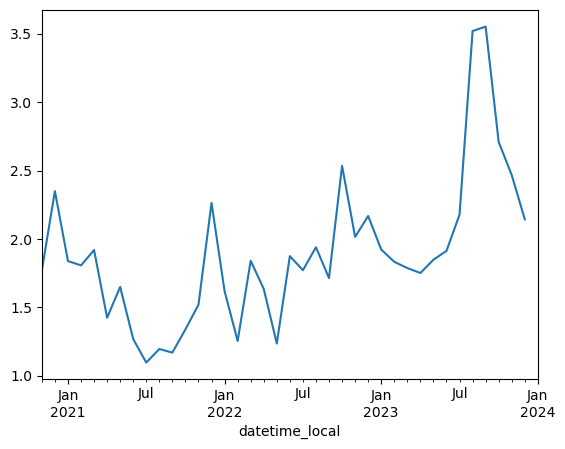

In [50]:
df_final.set_index('datetime_local')['ratio'].plot()

In [42]:
df_new.reset_index(axis=1)

TypeError: DataFrame.reset_index() got an unexpected keyword argument 'axis'

In [ ]:
df['dam_price_eur_mwh'].agg(['min', 'max', 'mean', 'std'])

In [ ]:
df.groupby(level='first')['col'].agg(['min', 'max', 'mean', 'std'])

In [ ]:
month_min =df.groupby(['month','year']).min()
month_max =df.groupby('month').max()
month_mean =df.groupby('month').mean()
month_std =df.groupby('month').std()
month_std

,datetime_local,dam_price_eur_mwh,previous_day_dam,entsoe_Solar,entsoe_Wind Onshore,temperature_2m_athens,cloudcover_athens,wind_speed_100m_athens,shortwave_radiation_athens,temperature_2m_thessaloniki,...,shortwave_radiation_heraklion,wx_temp_avg_c,wx_cloud_avg_pct,wx_wind100_avg,wx_swr_avg,wx_wind_power_idx,wx_solar_power_idx,dam_price_eur_mwh_diff,previous_day_dam_diff,day_of_week
month,,,,,,,,,,,,,,,,,,,,,
1,305 days 13:41:03.735716356,92.926073,92.319880,667.737637,743.329948,4.475838,41.456694,10.885472,162.051123,4.723418,...,163.136811,4.004341,28.863287,9.125258,153.485770,16827.335526,153.485770,26.624979,26.915117,2.070777
2,298 days 04:54:55.775485804,74.100301,74.759571,737.181245,767.182553,4.321801,41.514440,10.390851,208.553639,5.193864,...,211.163371,3.964256,30.152277,9.515964,201.940431,15765.233315,201.940431,17.581930,17.747325,2.000496
3,298 days 05:19:51.394896724,102.853347,102.939969,809.230576,708.688284,4.221886,40.115793,8.872403,259.199018,4.606423,...,257.457566,3.822174,28.842619,7.054779,249.060502,9455.692661,249.060502,25.358866,25.353122,1.955323
4,298 days 05:11:10.581294108,87.338793,87.687751,895.442145,645.732571,3.853411,41.120274,8.076593,306.194414,4.037942,...,314.055496,3.666717,30.530909,7.576508,298.316843,9506.676772,298.316843,26.698194,26.692805,1.984003
5,298 days 05:20:14.800660168,74.480257,74.160080,913.548844,593.024903,4.217122,40.900291,7.582632,327.614647,4.422576,...,340.102992,4.010626,31.070936,5.939580,322.387779,4577.656866,322.387779,16.743518,16.819916,2.057740
6,298 days 05:11:10.581294108,84.880800,82.636818,1008.640575,472.585707,4.417307,33.014354,6.754666,331.032488,4.457212,...,358.207778,4.044938,23.592114,5.258152,336.243651,3926.112406,336.243651,19.173886,18.988439,1.952374
7,298 days 05:20:14.800660168,128.333077,128.539624,1150.305891,605.956883,4.304111,14.098768,7.521369,357.002793,4.372403,...,369.077270,3.863637,11.160277,5.740109,353.941558,5430.872283,353.941558,31.035690,30.710234,2.010369
8,298 days 05:20:14.800660168,177.838545,171.010371,1139.399981,735.481638,3.977666,21.491860,7.725844,331.884043,4.094432,...,346.990991,3.648648,15.679986,5.806281,327.630277,4869.042874,327.630277,39.524630,38.949256,2.010369
9,298 days 05:11:10.581294108,155.208830,162.392179,1054.089522,757.384193,3.946144,33.820265,7.130155,283.725499,4.105285,...,299.105415,3.588250,23.242019,5.359091,280.451002,3885.507163,280.451002,36.061638,36.620597,1.952374


In [21]:
month_min =df.groupby(['month','year']).min()
month_max =df.groupby(['month','year']).max()
month_mean =df.groupby(['month','year']).mean()
month_std =df.groupby(['month','year']).std()


In [27]:
df.resample('M', on='datetime_local').agg(['min','max','mean','std'])

C:\Users\HarrisDeralas\AppData\Local\Temp\ipykernel_20964\2091026628.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M', on='datetime_local').agg(['min','max','mean','std'])


dam_price_eur_mwh                          \
                                        min         max        mean   
datetime_local                                                        
2020-11-30 00:00:00+02:00             17.03  110.140000   52.623966   
2020-12-31 00:00:00+02:00             -0.01  138.346176   58.892185   
2021-01-31 00:00:00+02:00              1.50   98.020000   52.519793   
2021-02-28 00:00:00+02:00             -0.01   90.960000   50.364493   
2021-03-31 00:00:00+03:00              0.00  110.600000   57.644426   
2021-04-30 00:00:00+03:00             10.40  101.730000   64.166632   
2021-05-31 00:00:00+03:00              0.00  104.130000   63.157153   
2021-06-30 00:00:00+03:00             38.88  144.640000   83.469496   
2021-07-31 00:00:00+03:00             48.79  160.370000  101.858817   
2021-08-31 00:00:00+03:00             62.71  208.120000  121.717366   
2021-09-30 00:00:00+03:00             59.50  216.940000  134.733354   
2021-10-31 00:00:00+03:00             78.56  344.000000  198.322911   
2021-11-30 00:00:00+02:00             37.38  385.000000  228.874921   
2021-12-31 00:00:00+02:00              9.70  542.500000  235.383544   
2022-01-31 00:00:00+02:00              9.70  377.400000  227.299860   
2022-02-28 00:00:00+02:00             83.65  349.000000  211.712819   
2022-03-31 00:00:00+03:00             98.32  600.070000  272.683192   
2022-04-30 00:00:00+03:00              0.09  403.140000  246.598912   
2022-05-31 00:00:00+03:00             60.80  338.650000  225.071068   
2022-06-30 00:00:00+03:00             20.23  470.900000  240.493633   
2022-07-31 00:00:00+03:00             87.38  686.250000  338.138521   
2022-08-31 00:00:00+03:00             90.00  936.330000  436.525753   
2022-09-30 00:00:00+03:00             28.45  742.720000  416.867457   
2022-10-31 00:00:00+02:00             30.53  620.000000  232.608018   
2022-11-30 00:00:00+02:00             44.70  503.550000  227.753609   
2022-12-31 00:00:00+02:00             -0.01  600.100000  276.887248   
2023-01-31 00:00:00+02:00              0.49  369.170000  191.793129   
2023-02-28 00:00:00+02:00              1.01  287.320000  156.242543   
2023-03-31 00:00:00+03:00              4.95  224.290000  122.759172   
2023-04-30 00:00:00+03:00              0.18  211.000000  120.435694   
2023-05-31 00:00:00+03:00              0.00  195.070000  105.589263   
2023-06-30 00:00:00+03:00              0.02  174.990000   91.489871   
2023-07-31 00:00:00+03:00              0.00  245.300000  112.679287   
2023-08-31 00:00:00+03:00              0.00  384.820000  109.326685   
2023-09-30 00:00:00+03:00              0.00  362.170000  101.946207   
2023-10-31 00:00:00+02:00              0.00  301.150000  111.190361   
2023-11-30 00:00:00+02:00              0.00  259.960000  105.402116   
2023-12-31 00:00:00+02:00              0.04  219.110000  102.201564   
2024-01-31 00:00:00+02:00              0.00    0.000000    0.000000   

                                      previous_day_dam              \
                                  std              min         max   
datetime_local                                                       
2020-11-30 00:00:00+02:00   17.790584        17.030000  110.140000   
2020-12-31 00:00:00+02:00   26.191930        -0.010000  138.346176   
2021-01-31 00:00:00+02:00   16.857857         1.500000   98.020000   
2021-02-28 00:00:00+02:00   16.610292        -0.010000   90.960000   
2021-03-31 00:00:00+03:00   12.950273         0.000000  110.600000   
2021-04-30 00:00:00+03:00   12.981709        10.400000  101.730000   
2021-05-31 00:00:00+03:00   15.314848         0.000000  104.130000   
2021-06-30 00:00:00+03:00   20.758773        38.880000  144.640000   
2021-07-31 00:00:00+03:00   21.306790        48.790000  160.350000   
2021-08-31 00:00:00+03:00   30.926239        62.710000  208.120000   
2021-09-30 00:00:00+03:00   28.633607        59.500000  216.940000   
2021-10-31 00:00:00+03:00   46.874473        78.560000  344.000

In [32]:
df

16104    43.09
16105    43.09
16106    43.01
16107    43.09
16108    43.09
         ...  
43843     0.00
43844     0.00
43845     0.00
43846     0.00
43847     0.00
Name: dam_price_eur_mwh, Length: 27744, dtype: float64

In [31]:
df.columns

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
df = df.loc['dam_price_eur_mwh']
df

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (426027034.py, line 1)

In [25]:
df.groupby(['month','year']).agg(['min','max','mean','std'])

datetime_local                            \
                                 min                       max   
month year                                                       
1     2021 2021-01-01 00:00:00+02:00 2021-01-31 23:00:00+02:00   
      2022 2022-01-01 00:00:00+02:00 2022-01-31 23:00:00+02:00   
      2023 2023-01-01 00:00:00+02:00 2023-01-31 23:00:00+02:00   
      2024 2024-01-01 00:00:00+02:00 2024-01-01 23:00:00+02:00   
2     2021 2021-02-01 00:00:00+02:00 2021-02-28 23:00:00+02:00   
      2022 2022-02-01 00:00:00+02:00 2022-02-28 23:00:00+02:00   
      2023 2023-02-01 00:00:00+02:00 2023-02-28 23:00:00+02:00   
3     2021 2021-03-01 00:00:00+02:00 2021-03-31 23:00:00+03:00   
      2022 2022-03-01 00:00:00+02:00 2022-03-31 23:00:00+03:00   
      2023 2023-03-01 00:00:00+02:00 2023-03-31 23:00:00+03:00   
4     2021 2021-04-01 00:00:00+03:00 2021-04-30 23:00:00+03:00   
      2022 2022-04-01 00:00:00+03:00 2022-04-30 23:00:00+03:00   
      2023 2023-04-01 00:00:00+03:00 2023-04-30 23:00:00+03:00   
5     2021 2021-05-01 00:00:00+03:00 2021-05-31 23:00:00+03:00   
      2022 2022-05-01 00:00:00+03:00 2022-05-31 23:00:00+03:00   
      2023 2023-05-01 00:00:00+03:00 2023-05-31 23:00:00+03:00   
6     2021 2021-06-01 00:00:00+03:00 2021-06-30 23:00:00+03:00   
      2022 2022-06-01 00:00:00+03:00 2022-06-30 23:00:00+03:00   
      2023 2023-06-01 00:00:00+03:00 2023-06-30 23:00:00+03:00   
7     2021 2021-07-01 00:00:00+03:00 2021-07-31 23:00:00+03:00   
      2022 2022-07-01 00:00:00+03:00 2022-07-31 23:00:00+03:00   
      2023 2023-07-01 00:00:00+03:00 2023-07-31 23:00:00+03:00   
8     2021 2021-08-01 00:00:00+03:00 2021-08-31 23:00:00+03:00   
      2022 2022-08-01 00:00:00+03:00 2022-08-31 23:00:00+03:00   
      2023 2023-08-01 00:00:00+03:00 2023-08-31 23:00:00+03:00   
9     2021 2021-09-01 00:00:00+03:00 2021-09-30 23:00:00+03:00   
      2022 2022-09-01 00:00:00+03:00 2022-09-30 23:00:00+03:00   
      2023 2023-09-01 00:00:00+03:00 2023-09-30 23:00:00+03:00   
10    2021 2021-10-01 00:00:00+03:00 2021-10-31 23:00:00+02:00   
      2022 2022-10-01 00:00:00+03:00 2022-10-31 23:00:00+02:00   
      2023 2023-10-01 00:00:00+03:00 2023-10-31 23:00:00+02:00   
11    2020 2020-11-02 00:00:00+02:00 2020-11-30 23:00:00+02:00   
      2021 2021-11-01 00:00:00+02:00 2021-11-30 23:00:00+02:00   
      2022 2022-11-01 00:00:00+02:00 2022-11-30 23:00:00+02:00   
      2023 2023-11-01 00:00:00+02:00 2023-11-30 23:00:00+02:00   
12    2020 2020-12-01 00:00:00+02:00 2020-12-31 23:00:00+02:00   
      2021 2021-12-01 00:00:00+02:00 2021-12-31 23:00:00+02:00   
      2022 2022-12-01 00:00:00+02:00 2022-12-31 23:00:00+02:00   
      2023 2023-12-01 00:00:00+02:00 2023-12-31 23:00:00+02:00   

                                                                          \
                                          mean                       std   
month year                                                                 
1     2021 2021-01-16 11:29:59.999999744+02:00 8 days 22:55:06.921256363   
      2022 2022-01-16 11:29:59.999999744+02:00 8 days 22:55:06.921256363   
      2023 2023-01-16 11:29:59.999999744+02:00 8 days 22:55:06.921256363   
      2024           2024-01-01 11:30:00+02:00 0 days 07:04:15.844122715   
2     2021           2021-02-14 23:30:00+02:00 8 days 02:08:02.307688497   
      2022           2022-02-14 23:30:00+02:00 8 days 02:08:02.307688497   
      2023           2023-02-14 23:30:00+02:00 8 days 02:08:02.307688497   
3     2021           2021-03-16 11:00:00+02:00 8 days 22:37:47.690537141   
      2022 2022-03-16 11:00:00.000000256+02:00 8 days 22:37:47.690537141   
      2023           2023-03-16 11:00:00+02:00 8 days 22:37:47.690537141   
4     2021           2021-04-15 23:30:00+03:00 8 days 15:59:25.383815251   
      2022           2022-04-15 23:30:00+03:00 8 days 15:59:25.383815251   
      2023           2023-04-15 23:30:00+03:00 8 days 15:59:25.383815251   
5     2021           2021-05-16 1

## Visualize the DAM series

In [13]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df["datetime_local"],
        y=df["dam_price_eur_mwh"],
        name="DAM Price",
        mode="lines"
    )
)

fig.add_trace(
    go.Scatter(
        x=df["datetime_local"],
        y=df["previous_day_dam"],
        name="Previous Day DAM Price",
        mode="lines"
    )
)

fig.update_layout(
    title="Day-Ahead Market Prices",
    xaxis_title="Date",
    yaxis_title="Price (EUR/MWh)",
    hovermode="x unified",
    xaxis=dict(rangeslider=dict(visible=True), type="date"),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.show()


## Generate dataset for LSTM ingestion

In [18]:
from price_forecast.config import DatasetCfg

cfgd = DatasetCfg(n_lookback_days=30,test_size=0.2,put_main_first = True)

In [19]:
from price_forecast.datasets.daily_sequence import DailySequenceDataset

builder = DailySequenceDataset(df, cfgd)
data = builder.build(return_dfs=True)

# scaled for training
X_train, y_train = data["X_train"], data["y_train"]

# unscaled for metrics/plots/inverse checks
X_train_raw, y_train_raw = data["X_train_raw"], data["y_train_raw"]


# tidy inspection (raw vs scaled)
X_train_df_raw = data["X_train_df_raw"]
X_train_df_scaled = data["X_train_df"]
y_train_df_raw = data["y_train_df_raw"]
X_test_df_raw = data["X_test_df_raw"]
y_test_df_raw = data["y_test_df_raw"]

c:\Users\HarrisDeralas\Downloads\panagiotis_files\price_forecast\src\price_forecast\datasets\daily_sequence.py:237: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  if not np.all(diffs.view("i8") == pd.Timedelta(hours=1).value):


In [17]:
cfgd = DatasetCfg(
    datetime_col="datetime_local",
    target_col="dam_price_eur_mwh",
    n_lookback_days=60,
    test_size=0.2,
    main_series="previous_day_dam",
    put_main_first=True,
)

builder = DailySequenceDataset(df, cfgd)
data = builder.build(return_dfs=True)

# scaled for training
X_train, y_train = data["X_train"], data["y_train"]

# unscaled for metrics/plots/inverse checks
X_train_raw, y_train_raw = data["X_train_raw"], data["y_train_raw"]

# tidy inspection (raw vs scaled)
X_train_df_raw = data["X_train_df_raw"]
X_train_df_scaled = data["X_train_df"]
y_train_df_raw = data["y_train_df_raw"]
X_test_df_raw = data["X_test_df_raw"]
y_test_df_raw = data["y_test_df_raw"]


# scaled arrays for training
X_train, X_test = data["X_train"], data["X_test"]
y_train, y_test = data["y_train"], data["y_test"]



c:\Users\HarrisDeralas\Downloads\panagiotis_files\price_forecast\src\price_forecast\datasets\daily_sequence.py:139: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



## Train the LSTM(s)

In [18]:
# X_train: (batch, input_steps, n_features)
# y_train: (batch, output_steps, output_dim)
from price_forecast.models.lstm_seq2seq import LSTMSeq2SeqModel
model = LSTMSeq2SeqModel.from_training_data(
    X_train, y_train,
    lstm_units=15*8,
    dropout=0.2,
)

# Optional explicit tail validation split
split = int(0.9 * X_train.shape[0])
history = model.fit(
    X_train=X_train[:split], y_train=y_train[:split],
    X_val=X_train[split:],   y_val=y_train[split:],
    epochs=60, batch_size=64, patience=10, reduce_lr_patience=5,
    checkpoint_path="best_lstm.keras",
    verbose=1,
)

# Predict, invert scaling with your builder, evaluate, and persist
y_pred_scaled = model.predict(X_test)
y_pred = builder.inverse_transform_target(y_pred_scaled)
y_true = builder.inverse_transform_target(y_test)
print(LSTMSeq2SeqModel.evaluate(y_true, y_pred))





c:\Users\HarrisDeralas\anaconda3\envs\price-forecast\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "lstm_seq2seq_day_ahead"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_lstm (LSTM)             │ (None, 120)            │        71,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dropout (Dropout)       │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_output_steps             │ (None, 24, 120)        │             0 │
│ (RepeatVector)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_lstm (LSTM)             │ (None, 24, 120)        │       115,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dropout (Dropout)       │ (None, 24, 120)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hourly_output (TimeDistributed) │ (None, 24, 1)          │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 187,321 (731.72 KB)

 Trainable params: 187,321 (731.72 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1.2069 - mae: 0.9508
Epoch 1: val_loss improved from None to 0.18644, saving model to best_lstm.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - loss: 1.5690 - mae: 1.0026 - val_loss: 0.1864 - val_mae: 0.3560 - learning_rate: 0.0010
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.4189 - mae: 0.5557
Epoch 2: val_loss did not improve from 0.18644
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - loss: 0.4424 - mae: 0.5240 - val_loss: 0.1941 - val_mae: 0.3651 - learning_rate: 0.0010
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.3110 - mae: 0.4616
Epoch 3: val_loss improved from 0.18644 to 0.14745, saving model to best_lstm.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - loss: 0.3796 - mae: 0.4818 - val_loss: 0.1475 - val_mae: 0.3053 - learning_rate: 0.0010
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.2670 - mae: 0.3971
Epoch 4: val_loss did not improve from 0.14745
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - l

In [19]:
# --- Imports (adjust the import path to your package layout) ---
from price_forecast.models.lstm_seq2seq_plus import LSTMSeq2SeqPlus  # the new model
from price_forecast.models.lstm_seq2seq import LSTMSeq2SeqModel      # old model (for evaluate reuse)

# X_train: (batch, input_steps, n_features)
# y_train: (batch, output_steps, output_dim)

# 1) Build the model by inferring shapes from data, with all hyperparams explicit
model_plus = LSTMSeq2SeqPlus.from_training_data(
    X_train=X_train,
    y_train=y_train,
    # --- Architecture ---
    enc_units=(128, 64),        # stacked encoder LSTMs; try (256,128) or (64,32)
    dec_units=128,              # decoder LSTM size; try 64/256
    bidirectional=True,         # use BiLSTM in encoder
    attention=True,             # AdditiveAttention over encoder sequence
    dropout=0.2,                # dropout between LSTM timesteps (Keras 'dropout')
    recurrent_dropout=0.0,      # use sparingly; slows training if >0
    layernorm=True,             # LayerNormalization after enc/dec
    residual_last24=True,       # concat projected last-24 inputs into the head
    # --- Training config (compile) ---
    optimizer="adam",
    loss="mse",
    metrics=("mae",),           # can add more, e.g. ("mae","mape")
    # --- Reproducibility ---
    seed=42,
)

# 2) Train (explicit tail validation split to keep temporal order)
split = int(0.9 * X_train.shape[0])
history_plus = model_plus.fit(
    X_train=X_train[:split],
    y_train=y_train[:split],
    X_val=X_train[split:],
    y_val=y_train[split:],
    epochs=80,                 # a bit higher by default for the larger model
    batch_size=64,
    patience=10,
    min_delta=1e-4,
    reduce_lr_patience=5,
    checkpoint_path="best_lstm_plus.keras",  # saves the full model
    verbose=1,
    shuffle=False,             # keep temporal ordering
)

# 3) Predict (scaled), inverse-transform, evaluate, and persist
y_pred_scaled_plus = model_plus.predict(X_test, batch_size=256, verbose=0)
y_pred_plus = builder.inverse_transform_target(y_pred_scaled_plus)
y_true = builder.inverse_transform_target(y_test)

print("PLUS metrics:", LSTMSeq2SeqModel.evaluate(y_true, y_pred_plus))  # reuse the same evaluate helper

# 4) Save & (optionally) restore
model_plus.save("final_lstm_plus.keras")
restored_plus = LSTMSeq2SeqPlus.load("best_lstm_plus.keras")


Model: "lstm_seq2seq_plus"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer) │ (None, 1440, 28)  │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidir_enc_1         │ [(None, 1440,     │    160,768 │ inputs[0][0]      │
│ (Bidirectional)     │ 256), (None,      │            │                   │
│                     │ 128), (None,      │            │                   │
│                     │ 128), (None,      │            │                   │
│                     │ 128), (None,      │            │                   │
│                     │ 128)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_ln_1            │ (None, 1440, 256) │        512 │ bidir_enc_1[0][0] │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidir_enc_2         │ [(None, 1440,     │    164,352 │ enc_ln_1[0][0]    │
│ (Bidirectional)     │ 128), (None, 64), │            │                   │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_ln_2            │ (None, 1440, 128) │        256 │ bidir_enc_2[0][0] │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_avg_pool        │ (None, 128)       │          0 │ enc_ln_2[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_2_h_concat      │ (None, 128)       │          0 │ bidir_enc_2[0][1… │
│ (Concatenate)       │                   │            │ bidir_enc_2[0][3] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_2_c_concat      │ (None, 128)       │          0 │ bidir_enc_2[0][2… │
│ (Concatenate)       │                   │            │ bidir_enc_2[0][4] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_output_steps │ (None, 24, 128)   │          0 │ enc_avg_pool[0][… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ init_h (Dense)      │ (None, 128)       │     16,512 │ enc_2_h_concat[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ init_c (Dense)      │ (None, 128)       │     16,512 │ enc_2_c_concat[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_lstm (LSTM)     │ [(None, 24, 128), │    131,584 │ repeat_output_st… │
│                     │ (None, 128),      │            │ init_h[0][0],     │
│                     │ (None, 128)]      │            │ init_c[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_ln              │ (None, 24, 128)   │        256 │ dec_lstm[0][0]    │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ additive_attention  │ (None, 24, 128)   │        128 │ dec_ln[0][0],     │
│ (AdditiveAttention) │                   │            │ enc_ln_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ last24_slice        │ (None, 24, 28)    │          0 │ inputs[0][0]      │
│ (Cropping1D)        │                   │            │                 

 Total params: 526,417 (2.01 MB)

 Trainable params: 526,417 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29s/step - loss: 2.8850 - mae: 1.4195 
Epoch 1: val_loss improved from None to 2.15707, saving model to best_lstm_plus.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 401s 30s/step - loss: 3.3598 - mae: 1.5274 - val_loss: 2.1571 - val_mae: 1.4005 - learning_rate: 0.0010
Epoch 2/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 41s/step - loss: 3.3565 - mae: 1.6086 
Epoch 2: val_loss improved from 2.15707 to 0.68624, saving model to best_lstm_plus.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 531s 42s/step - loss: 3.6861 - mae: 1.6106 - val_loss: 0.6862 - val_mae: 0.7584 - learning_rate: 0.0010
Epoch 3/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 90s/step - loss: 1.3203 - mae: 0.9470  
Epoch 3: val_loss improved from 0.68624 to 0.39886, saving model to best_lstm_plus.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 1141s 91s/step - loss: 1.2720 - mae: 0.8879 - val_loss: 0.3989 - val_mae: 0.5480 - learning_rate: 0.0010
Epoch 4/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 65s/step - loss: 0.5625 - mae: 0.5879  
Epoch 4: val_loss im

Model: "lstm_seq2seq_plus"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer) │ (None, 1440, 28)  │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidir_enc_1         │ [(None, 1440,     │    160,768 │ inputs[0][0]      │
│ (Bidirectional)     │ 256), (None,      │            │                   │
│                     │ 128), (None,      │            │                   │
│                     │ 128), (None,      │            │                   │
│                     │ 128), (None,      │            │                   │
│                     │ 128)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_ln_1            │ (None, 1440, 256) │        512 │ bidir_enc_1[0][0] │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidir_enc_2         │ [(None, 1440,     │    164,352 │ enc_ln_1[0][0]    │
│ (Bidirectional)     │ 128), (None, 64), │            │                   │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_ln_2            │ (None, 1440, 128) │        256 │ bidir_enc_2[0][0] │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_avg_pool        │ (None, 128)       │          0 │ enc_ln_2[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_2_h_concat      │ (None, 128)       │          0 │ bidir_enc_2[0][1… │
│ (Concatenate)       │                   │            │ bidir_enc_2[0][3] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_2_c_concat      │ (None, 128)       │          0 │ bidir_enc_2[0][2… │
│ (Concatenate)       │                   │            │ bidir_enc_2[0][4] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_output_steps │ (None, 24, 128)   │          0 │ enc_avg_pool[0][… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ init_h (Dense)      │ (None, 128)       │     16,512 │ enc_2_h_concat[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ init_c (Dense)      │ (None, 128)       │     16,512 │ enc_2_c_concat[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_lstm (LSTM)     │ [(None, 24, 128), │    131,584 │ repeat_output_st… │
│                     │ (None, 128),      │            │ init_h[0][0],     │
│                     │ (None, 128)]      │            │ init_c[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_ln              │ (None, 24, 128)   │        256 │ dec_lstm[0][0]    │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ additive_attention  │ (None, 24, 128)   │        128 │ dec_ln[0][0],     │
│ (AdditiveAttention) │                   │            │ enc_ln_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ last24_slice        │ (None, 24, 28)    │          0 │ inputs[0][0]      │
│ (Cropping1D)        │                   │            │                 

 Total params: 526,417 (2.01 MB)

 Trainable params: 526,417 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

## Naive predictions (benchmark) [same as previous day]

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

test_start_date = y_test_df_raw['datetime'].min()
test_df = df[df['datetime_local'] >= test_start_date].copy()
naive_mae = mean_absolute_error(test_df['dam_price_eur_mwh'], test_df['previous_day_dam'])
naive_mse = mean_squared_error(test_df['dam_price_eur_mwh'], test_df['previous_day_dam'])
print("Naive (previous day) baseline:")
print("MSE:", naive_mse, "MAE:", naive_mae)

NameError: name 'y_test_df_raw' is not defined

## Test with relative features

In [10]:
datetime_col = "datetime_local"
target_col   = "dam_price_eur_mwh"
main_series  = "previous_day_dam"

In [11]:
from sklearn.preprocessing import StandardScaler
from price_forecast.config import DatasetCfg
from price_forecast.config import SafeStandardScaler

cfg = DatasetCfg(
    datetime_col=datetime_col,
    target_col=target_col,
    main_series=main_series,        # used for feature ordering
    put_main_first=True,            # keep previous_day_dam as first feature
    n_lookback_days=30,              # encoder lookback (=> input_steps = 7*24)
    test_size=0.2,                  # tail split by whole days
    scale_features=True,
    feature_scaler=SafeStandardScaler(),
    scale_target=True,
    target_scaler=SafeStandardScaler())

In [14]:
from price_forecast.datasets.daily_sequence import DailySequenceDataset

builder = DailySequenceDataset(df, cfg)

# Example 1: Predict ABSOLUTE target; drop *_diff target from X
out = builder.build(keep_only_diff=False,
                     diff_as_target=False, return_dfs=True)   



c:\Users\HarrisDeralas\Downloads\panagiotis_files\price_forecast\src\price_forecast\datasets\daily_sequence.py:321: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  if not np.all(diffs.view("i8") == pd.Timedelta(hours=1).value):


In [15]:
out = builder.build(return_dfs=True)

X_train, X_test = out["X_train"], out["X_test"]        # (S, N*24, F)
y_train, y_test = out["y_train"], out["y_test"]        # (S, 24, 1)


# tidy inspection (raw vs scaled)
X_train_df_raw = out["X_train_df_raw"]
X_train_df_scaled = out["X_train_df"]
y_train_df_raw = out["y_train_df_raw"]
X_test_df_raw = out["X_test_df_raw"]
y_test_df_raw = out["y_test_df_raw"]



In [1]:
df.loc[df['datetime_local'] >= y_test_df_raw['datetime'].min()]

NameError: name 'df' is not defined

In [17]:
y_test_df_raw

datetime  dam_price_eur_mwh
sample hour                                             
0      0    2023-05-21 01:00:00+03:00              88.50
       1    2023-05-21 02:00:00+03:00              80.01
       2    2023-05-21 03:00:00+03:00              80.00
       3    2023-05-21 04:00:00+03:00              76.60
       4    2023-05-21 05:00:00+03:00              80.00
...                               ...                ...
224    19   2023-12-31 19:00:00+02:00             123.82
       20   2023-12-31 20:00:00+02:00             129.03
       21   2023-12-31 21:00:00+02:00             117.23
       22   2023-12-31 22:00:00+02:00             108.96
       23   2023-12-31 23:00:00+02:00             106.12

[5400 rows x 2 columns]

In [23]:
from price_forecast.models.lstm_seq2seq import LSTMSeq2SeqModel

model = LSTMSeq2SeqModel.from_training_data(
    X_train, y_train,
    lstm_units=15 * 8,      # your earlier choice
    dropout=0.2,
    recurrent_dropout=0.0,
    optimizer="adam",
    loss="mse",
    metrics=("mae",),
    seed=42,
)

# Tail validation split is handled inside .fit() if you don't pass X_val/y_val
history = model.fit(
    X_train=X_train, y_train=y_train,
    epochs=60,
    batch_size=64,
    patience=10,
    reduce_lr_patience=5,
    checkpoint_path="best_lstm.keras",   # saves the full model
    verbose=1,
    shuffle=False,                       # keep temporal ordering
)



c:\Users\HarrisDeralas\anaconda3\envs\price-forecast\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "lstm_seq2seq_day_ahead"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_lstm (LSTM)             │ (None, 120)            │        72,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dropout (Dropout)       │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_output_steps             │ (None, 24, 120)        │             0 │
│ (RepeatVector)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_lstm (LSTM)             │ (None, 24, 120)        │       115,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dropout (Dropout)       │ (None, 24, 120)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hourly_output (TimeDistributed) │ (None, 24, 1)          │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 187,801 (733.60 KB)

 Trainable params: 187,801 (733.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 1.2555 - mae: 1.0063
Epoch 1: val_loss improved from None to 0.20042, saving model to best_lstm.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - loss: 1.5114 - mae: 1.0240 - val_loss: 0.2004 - val_mae: 0.3635 - learning_rate: 0.0010
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 900ms/step - loss: 0.4690 - mae: 0.5968
Epoch 2: val_loss improved from 0.20042 to 0.18300, saving model to best_lstm.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 946ms/step - loss: 0.4502 - mae: 0.5382 - val_loss: 0.1830 - val_mae: 0.3589 - learning_rate: 0.0010
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 986ms/step - loss: 0.2513 - mae: 0.3950
Epoch 3: val_loss improved from 0.18300 to 0.12517, saving model to best_lstm.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - loss: 0.3408 - mae: 0.4374 - val_loss: 0.1252 - val_mae: 0.2787 - learning_rate: 0.0010
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 996ms/step - loss: 0.2639 - mae: 0.3934
Epoch 4: val_loss did not improve from 0

In [ ]:
if out["meta"]["target_mode"] == "diff":
    bases = out["y_test_bases"]
    y_pred_abs = builder.inverse_transform_target(y_pred_scaled, diff_as_target=True,  bases=bases)
    y_true_abs = builder.inverse_transform_target(y_test,         diff_as_target=True,  bases=bases)
else:
    y_pred_abs = builder.inverse_transform_target(y_pred_scaled, diff_as_target=False)
    y_true_abs = builder.inverse_transform_target(y_test,         diff_as_target=False)

metrics = LSTMSeq2SeqModel.evaluate(y_true_abs, y_pred_abs)
print("Test metrics (abs units):", metrics)

In [11]:
y_pred_test_scaled = model.predict(X_test, batch_size=256, verbose=0)

In [12]:
# The dataset helper handles both scaling-only and relative+scaling modes.
if y_test_bases is not None:
    # Relative mode: provide per-sample bases
    y_pred_test_abs = builder.inverse_transform_target(y_pred_test_scaled, bases=y_test_bases)
    y_true_test_abs = builder.inverse_transform_target(y_test,             bases=y_test_bases)
else:
    # Absolute mode (no relative deltas): inverse scaling only (or no-op if disabled)
    y_pred_test_abs = builder.inverse_transform_target(y_pred_test_scaled)
    y_true_test_abs = builder.inverse_transform_target(y_test)

# -------------------------
# 7) Simple evaluation (MAE/MSE)
# -------------------------
metrics = LSTMSeq2SeqModel.evaluate(y_true_test_abs, y_pred_test_abs)
print("Test metrics (abs units):", metrics)

Test metrics (abs units): {'mse': 1.617213708006274e+23, 'mae': 41342048544.763695}
